In [4]:
import math

# Function to calculate GCD
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

# Function to generate prime numbers
def generate_primes(n):
    primes = []
    num = 2
    while len(primes) < n:
        if all(num % i != 0 for i in range(2, int(math.sqrt(num)) + 1)):
            primes.append(num)
        num += 1
    return primes

# Main function
def main():
    # Generate first 100 prime numbers
    primes = generate_primes(100)
    
    # Number for which GCD will be calculated
    number = 11200
    
    # Count of prime numbers with GCD 1
    count = 0
    
    # Calculate GCD for each prime number
    for prime in primes:
        gcd_value = gcd(prime, number)
        if gcd_value == 1:
            count += 1
            if count == 4:
                print(f"The fourth smallest prime number with GCD 1 with {number} is {prime}")
                break

if __name__ == "__main__":
    main()

The fourth smallest prime number with GCD 1 with 11200 is 17


In [1]:
import random

def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    m0, x0, x1 = m, 0, 1
    while a > 1:
        q = a // m
        m, a = a % m, m
        x0, x1 = x1 - q * x0, x0
    return x1 + m0 if x1 < 0 else x1

def generate_keypair(p, q):
    if not (is_prime(p) and is_prime(q)):
        raise ValueError("Both numbers must be prime.")
    elif p == q:
        raise ValueError("p and q cannot be equal.")
    #n = p * q
    n = 11413
    phi = (p - 1) * (q - 1)
    e = 3533
    #e = random.randrange(1, phi)
    #while gcd(e, phi) != 1:
    #    e = random.randrange(1, phi)
    #d = mod_inverse(e, phi)
    d = 6597
    return ((e, n), (d, n))

def encrypt(public_key, plaintext):
    e, n = public_key
    cipher = pow(plaintext, e, n)
    return cipher

def decrypt(private_key, ciphertext):
    d, n = private_key
    plain = pow(ciphertext, d, n)
    return plain

# Example usage:
p = 61
q = 53

public_key, private_key = generate_keypair(p, q)
print("Public key:", public_key)
print("Private key:", private_key)

message = 9726
print("Original message:", message)

encrypted_msg = encrypt(public_key, message)
print("Encrypted message:", encrypted_msg)

decrypted_msg = decrypt(private_key, encrypted_msg)
print("Decrypted message:", decrypted_msg)


Public key: (3533, 11413)
Private key: (6597, 11413)
Original message: 9726
Encrypted message: 5761
Decrypted message: 9726


In [2]:
import random

def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    m0, x0, x1 = m, 0, 1
    while a > 1:
        q = a // m
        m, a = a % m, m
        x0, x1 = x1 - q * x0, x0
    return x1 + m0 if x1 < 0 else x1

def generate_keypair(p, q):
    if not (is_prime(p) and is_prime(q)):
        raise ValueError("Both numbers must be prime.")
    elif p == q:
        raise ValueError("p and q cannot be equal.")
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 13
    #e = random.randrange(1, phi)
    #while gcd(e, phi) != 1:
    #    e = random.randrange(1, phi)
    d = mod_inverse(e, phi)
    return ((e, n), (d, n))

def encrypt(public_key, plaintext):
    e, n = public_key
    cipher = pow(plaintext, e, n)
    return cipher

def decrypt(private_key, ciphertext):
    d, n = private_key
    plain = pow(ciphertext, d, n)
    return plain

# Example usage:
p = 101
q = 113

public_key, private_key = generate_keypair(p, q)
print("Public key:", public_key)
print("Private key:", private_key)

#message = 9726
#print("Original message:", message)

#encrypted_msg = encrypt(public_key, message)
encrypted_msg = 9167
print("Encrypted message:", encrypted_msg)

decrypted_msg = decrypt(private_key, encrypted_msg)
print("Decrypted message:", decrypted_msg)


Public key: (13, 11413)
Private key: (9477, 11413)
Encrypted message: 9167
Decrypted message: 9726


Probabilities:


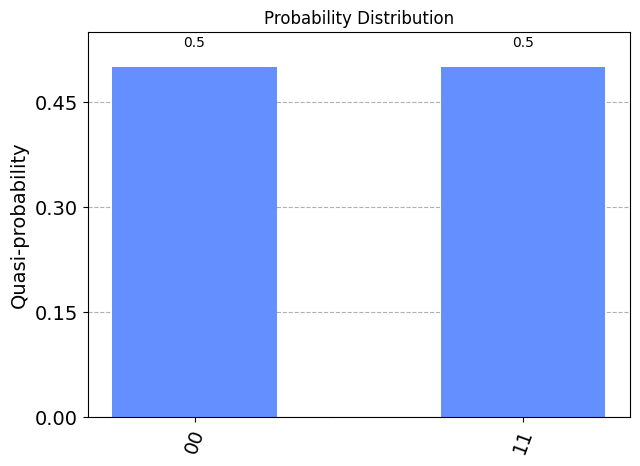

In [15]:
# write your code here
#################################################
%matplotlib inline

# Imports of the Qiskit basic functionalities
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector, random_statevector, partial_trace
from qiskit.visualization import plot_distribution, plot_bloch_multivector

import numpy as np

# Function: simulate_circuit(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs a multi-shot
# simulation and returns the results.
def simulate_circuit(qc, trials = 100000):

    # Execute the simulation for the given number of shots
    job = Sampler().run(qc, shots = trials)

    # Collect the results from the job
    result = job.result()

    # Obtain the counts from the results
    statistics = result.quasi_dists[0].binary_probabilities()

    return result, statistics

# Create a quantum register of 2 qubits
qr = QuantumRegister(2)

# create a classical register of 2 bits
cr = ClassicalRegister(2)

# create a quantum circuit
qc = QuantumCircuit(qr, cr)

# Create a Bell state (entangled state)
qc.h(qr[0]) # Apply Hadamard gate to qubit 0
qc.cx(qr[0], qr[1]) # Apply CNOT gate with control qubit 0 and target qubit 1

# Apply X gate to the second qubit
#qc.x(qr[0])

# Apply Z gate to the third qubit
qc.z(qr[0])

#state = Statevector.from_instruction(qc)
#plot_bloch_multivector(state)

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

# Draw the quantum circuit
#qc.draw(output='mpl')

# Execute the simulation for 10000 trials
result, statistics = simulate_circuit(qc, 10000)

# Draw the quantum circuit
qc.draw(output='mpl')

# Plotting the histogram of the results
print("Probabilities:")
plot_distribution(statistics, title = "Probability Distribution")

#################################################

In [29]:
#################################################
%matplotlib inline

# Imports of the Qiskit basic functionalities
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector, random_statevector, partial_trace
from qiskit.visualization import plot_distribution, plot_bloch_multivector
import random

def create_bell_pair():
    qc = QuantumCircuit(2, 2)
    qc.h(0)  # Hadamard gate on qubit 0
    qc.cx(0, 1)  # CNOT gate with control qubit 0 and target qubit 1
    return qc

def measure_in_random_basis(qc, qubit, classical_bit, basis):
    if basis == 'X':
        qc.h(qubit)
    qc.measure(qubit, classical_bit)
    
def bbm92_protocol(num_bits):
    alice_basis_choices = [random.choice(['X', 'Z']) for _ in range(num_bits)]
    bob_basis_choices = [random.choice(['X', 'Z']) for _ in range(num_bits)]
    
    alice_bits = []
    bob_bits = []
    
    for alice_basis, bob_basis in zip(alice_basis_choices, bob_basis_choices):
        # Create Bell pair
        qc = create_bell_pair()
        
        # Measure Alice's qubit in her chosen basis
        measure_in_random_basis(qc, 0, 0, alice_basis)
        
        # Measure Bob's qubit in his chosen basis
        measure_in_random_basis(qc, 1, 1, bob_basis)
        
        # Simulate the circuit
        #backend = Aer.get_backend('qasm_simulator')
        #qc = transpile(qc, backend)
        #counts = execute(qc, backend, shots=1).result().get_counts()
        #outcome = list(counts.keys())[0]
        # Execute the simulation for the given number of shots
        job = Sampler().run(qc, shots = 10)

        # Collect the results from the job
        result = job.result()
        # Obtain the counts from the results
        statistics = result.quasi_dists[0].binary_probabilities()

        max_key = max(statistics, key=statistics.get)
        
        alice_bits.append(int(max_key[0]))
        bob_bits.append(int(max_key[1]))
    
    return alice_bits, bob_bits, alice_basis_choices, bob_basis_choices

num_bits = 100  # Example number of bits to generate
alice_bits, bob_bits, alice_bases, bob_bases = bbm92_protocol(num_bits)

print("Alice's bits:", alice_bits)
print("Bob's bits:", bob_bits)
print("Alice's bases:", alice_bases)
print("Bob's bases:", bob_bases)



Alice's bits: [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
Bob's bits: [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
Alice's bases: ['Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', '

In [30]:
def sift_keys(alice_bits, bob_bits, alice_bases, bob_bases):
    sifted_key_alice = []
    sifted_key_bob = []
    
    for ab, bb, a_bit, b_bit in zip(alice_bases, bob_bases, alice_bits, bob_bits):
        if ab == bb:
            sifted_key_alice.append(a_bit)
            sifted_key_bob.append(b_bit)
    
    return sifted_key_alice, sifted_key_bob

sifted_key_alice, sifted_key_bob = sift_keys(alice_bits, bob_bits, alice_bases, bob_bases)

print("Sifted key (Alice):", sifted_key_alice)
print("Sifted key (Bob):", sifted_key_bob)

Sifted key (Alice): [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
Sifted key (Bob): [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
